## EXPLORATORY DATA ANALYSIS 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [3]:
dataset = pd.read_csv("/kaggle/input/project-ml/US  E-commerce records 2020.csv",encoding='windows-1252'
                     )

In [4]:
dataset.shape

(3312, 19)

In [5]:
dataset.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [7]:
dataset.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
std,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342
min,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800


In [8]:
dataset.isnull().sum()

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
dataset.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
data = dataset.loc[:, ['Order Date', 'Ship Mode','Segment', 'Region','Category', 'Sales',
                   'Quantity', 'Discount', 'Profit']]

In [11]:
data.head(10)

,Order Date,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount,Profit
0,01-01-20,Standard Class,Consumer,East,Furniture,48.896,4,0.2,8.5568
1,01-01-20,Standard Class,Consumer,West,Furniture,474.430,11,0.0,199.2606
2,01-01-20,First Class,Home Office,Central,Office Supplies,3.600,2,0.0,1.7280
3,01-01-20,Standard Class,Consumer,Central,Office Supplies,454.560,5,0.2,-107.9580
4,01-01-20,Standard Class,Consumer,Central,Furniture,141.420,5,0.6,-187.3815
5,01-01-20,Standard Class,Consumer,Central,Furniture,310.744,4,0.3,-26.6352
6,01-01-20,Standard Class,Consumer,Central,Office Supplies,12.736,4,0.2,2.2288
7,01-01-20,Standard Class,Consumer,Central,Office Supplies,6.470,5,0.8,-9.7050
8,01-01-20,Standard Class,Consumer,Central,Office Supplies,13.748,14,0.8,-22.6842
9,01-01-20,Standard Class,Consumer,Central,Office Supplies,15.224,2,0.8,-38.8212


In [12]:
data["Order Date"] = pd.to_datetime(data["Order Date"], format='%d-%m-%y')
data["Month of Order"] = data["Order Date"].dt.month

month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
               7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
data["Month of Order"] = data["Month of Order"].map(month_names)

In [13]:
pandas_profile_key = ProfileReport(data,title="E-commerce records 2020 Report")
pandas_profile_key.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
categorical = [var for var in data.columns if data[var].dtype=='O']

for var in categorical:
    print(var, ' contains ', len(data[var].unique()), 'unique values')

Ship Mode  contains  4 unique values
Segment  contains  3 unique values
Region  contains  4 unique values
Category  contains  3 unique values
Month of Order  contains  12 unique values


## Data visualization

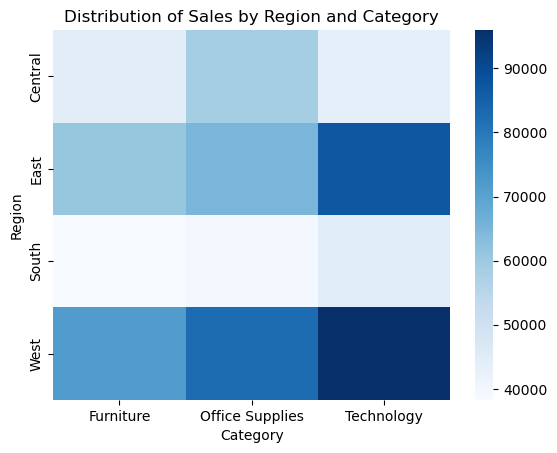

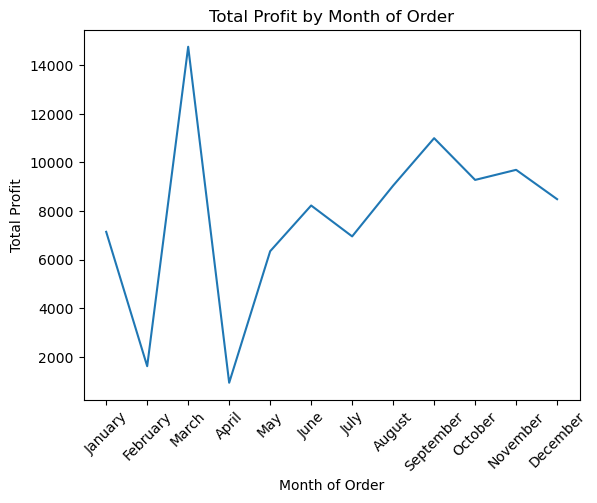

In [15]:
pivot = pd.pivot_table(data, values="Sales", index="Region", columns="Category", aggfunc="sum")
sns.heatmap(pivot, cmap="Blues")
plt.xlabel("Category")
plt.ylabel("Region")
plt.title("Distribution of Sales by Region and Category")
plt.show()

data["Order Date"] = pd.to_datetime(data["Order Date"], format='%d-%m-%y')
profit_by_month = data.pivot_table(index="Month of Order", values="Profit", aggfunc="sum").reset_index()
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
profit_by_month["Month of Order"] = pd.Categorical(profit_by_month["Month of Order"], categories=month_names, ordered=True)
profit_by_month = profit_by_month.sort_values("Month of Order")
plt.plot(profit_by_month["Month of Order"], profit_by_month["Profit"])
plt.xlabel("Month of Order")
plt.ylabel("Total Profit")
plt.title("Total Profit by Month of Order")
plt.xticks(rotation=45)
plt.show()


* Profit : 0.90
* Segment : 0.37 
* Ship mode : 0.556
* Region : 0.31
* Category : 0.60

# Naive bayes classifier

In [16]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(data[['Ship Mode', 'Region', 'Category', 'Sales', 'Quantity', 'Discount']], data['Profit'], test_size=0.2, random_state=42)

encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[['Ship Mode', 'Region', 'Category']])
X_test_encoded = encoder.transform(X_test[['Ship Mode', 'Region', 'Category']])

X_train_combined = pd.concat([pd.DataFrame(X_train_encoded.toarray()), X_train[['Sales', 'Quantity', 'Discount']].reset_index(drop=True)], axis=1)
X_test_combined = pd.concat([pd.DataFrame(X_test_encoded.toarray()), X_test[['Sales', 'Quantity', 'Discount']].reset_index(drop=True)], axis=1)

y_train_binary = [1 if profit > 0 else 0 for profit in y_train]
y_test_binary = [1 if profit > 0 else 0 for profit in y_test]

clf = GaussianNB()
clf.fit(X_train_combined, y_train_binary)

y_pred = clf.predict(X_train_combined)

accuracy = accuracy_score(y_train_binary, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9192147980369951


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


* Ship mode : 0.93
* ship mode and category : 0.934
* sales : 0.934
* quantity and ship mode and category: 0.9346
* sales and quantity : 0.9373

## Dimensionality Reduction

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data[[ 'Region' ,'Ship Mode',  'Sales', 'Discount']], data['Profit'], test_size=0.2, random_state=42)

encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[[  'Region' ]])
X_test_encoded = encoder.transform(X_test[[  'Region']])

X_train_combined = pd.concat([pd.DataFrame(X_train_encoded.toarray()), X_train[[ 'Sales', 'Discount']].reset_index(drop=True)], axis=1)
X_test_combined = pd.concat([pd.DataFrame(X_test_encoded.toarray()), X_test[[ 'Sales', 'Discount']].reset_index(drop=True)], axis=1)

y_train_binary = [1 if profit > 0 else 0 for profit in y_train]
y_test_binary = [1 if profit > 0 else 0 for profit in y_test]

clf = GaussianNB()
clf.fit(X_train_combined, y_train_binary)

y_pred = clf.predict(X_train_combined)

accuracy = accuracy_score(y_train_binary, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9346923367308418


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## Predict

In [19]:
predict = {
    "0" : [1],
    "1" : [0],
    "2" : [0],
    "3" : [0],
    "Sales" : 1,
    "Discount" : 0
        }
p = pd.DataFrame(data=predict)
y_pred1 = clf.predict(p)
print(y_pred1)

[1]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_binary, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 355  164]
 [   9 2121]]

True Positives(TP) =  355

True Negatives(TN) =  2121

False Positives(FP) =  164

False Negatives(FN) =  9


<AxesSubplot:>

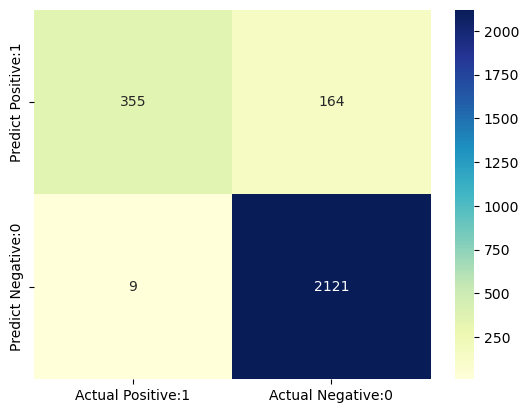

In [21]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification report and accuracy

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_train_binary, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80       519
           1       0.93      1.00      0.96      2130

    accuracy                           0.93      2649
   macro avg       0.95      0.84      0.88      2649
weighted avg       0.94      0.93      0.93      2649



In [23]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9347


## Conclusion
In this e-commerce data analysis project, we used a Naive Bayes algorithm to predict whether a transaction resulted in a profit or a loss. We trained the algorithm on a dataset that included features such as order date, ship mode, segment, region, category, sales, quantity, discount, and profit.

After preprocessing the data and encoding the categorical features, we trained the Naive Bayes classifier using scikit-learn library and evaluated its performance using accuracy as a metric. The trained model achieved an accuracy of 93.47%, which indicates that the model is performing well and can be used to predict whether a new transaction will result in a profit or a loss.

Based on this analysis, we can conclude that the Naive Bayes algorithm is an effective tool for predicting profit or loss in e-commerce transactions. This model can help businesses to identify which transactions are more likely to result in profits, and take appropriate actions to optimize their operations.